In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import dataframe_image as dfi
#Dependencies
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain


#123
user_file = "C:\\Users\\zachi\\Desktop\\final_project_22\\data_nov_21.xlsx"
df=pd.read_excel(user_file)


In [14]:
#remove column - "removed 1"

df.drop(columns=['Removed 1'],inplace=True)

In [15]:
#make category easier to understand 

df=df.replace({'Category' : { 'Y' : "Antisemitic", 'W' : "Non-Antisemitic", 'U' : "Anti-Zionist" }})


In [16]:
#convert "time stamp" to english

df = df.rename(columns={"חותמת זמן":"Time stamp"})


In [2]:
#Remove unnecessary column - "removed 1"

df.drop(columns=['Removed 1'],inplace=True)

#Make the Category column easier to understand 

df=df.replace({'Category' : { 'Y' : "Antisemitic", 'W' : "Non-Antisemitic", 'U' : "Anti-Zionist" }})



#Convert "time stamp" to english

df = df.rename(columns={"חותמת זמן":"Time stamp"})

#Change the date time to the d/m/y

from datetime import datetime
df['Time stamp'] = pd.to_datetime(df['Time stamp'], errors='coerce') #This function convert the date text into dt.date type


#Fix the Summary column's text

df = df.replace(r'\n',' ', regex=True) 

posts_description = df["A short summary of the content- write briefly in your own words "]


#get rid of NaNs in category

list = ["Anti-Zionist",
"Antisemitic",
"Non-Antisemitic"]

df = df.loc[df['Category'] .isin(list)]
#This line is keeping rows which have one of the categories



Grpuping the content through the web by time

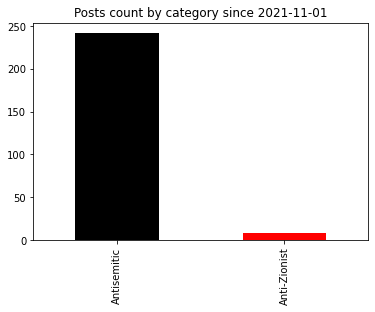

In [3]:
user_input = "2021-11-01"
the_user_target_date = df["Time stamp"]>user_input
new_df = df[the_user_target_date]
post_count_by_category = new_df["Category"].value_counts().plot(kind="bar",color=['black', 'red', 'green', 'blue', 'cyan'],title = "Posts count by category since" + " " + user_input)

plt.savefig("content_category_in_the_web.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

Mapping content removal

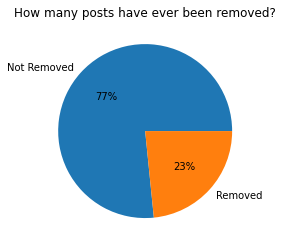

In [69]:
#Cheking the percentage of posts removing in general view

status = df["Removed"]

general_removal_view = status.value_counts() #get general info about the removal process of platforms

general_removal_view = general_removal_view.plot(kind = "pie" , autopct='%1.0f%%', title = "How many posts have ever been removed?")

general_removal_view.get_yaxis().set_visible(False)


plt.savefig("content_removal_stat.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)



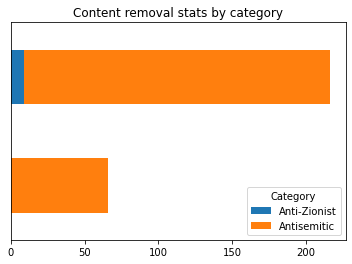

In [70]:

outpot_category_removal_stats_group = df.groupby(['Removed', 'Category'])['Category'].count().unstack('Category').fillna(0).astype(int).reindex(index = ['Removed','Not Removed'])
outpot_category_removal_stats = outpot_category_removal_stats_group.astype("int").plot(kind='barh', stacked=True,mark_right = True, title = "Content removal stats by category")

outpot_category_removal_stats.get_yaxis().set_visible(False)

plt.savefig("content_removal_stat_categoty.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)


In [24]:
precentage_chart = outpot_category_removal_stats_group/outpot_category_removal_stats_group[outpot_category_removal_stats_group.columns].sum()*100
precentage_chart = precentage_chart.round(1).astype(str) +'%'

dfi.export(precentage_chart,"precentage_chart_plot.png")



In [86]:
#A full pdf report extraction

from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF

pdf = FPDF()

pdf.add_page()

pdf.set_font('Arial', size = 16)

pdf.cell(40)

pdf.cell(75, 10,'Report for media', 0, 2, 'C')

pdf.cell(90, 20, '', 0, 2, 'C')
pdf.cell(-15)

pdf.image("content_category_in_the_web.png")

pdf.cell(90, 20, '', 0, 2, 'C')
pdf.cell(-3)

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-3)

pdf.image("content_removal_stat.png")

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-10)

pdf.image("content_removal_stat_categoty.png")

pdf.cell(100, 10, '', 0, 2, 'C')
pdf.cell(10)

pdf.cell(100, 10, '', 0, 2, 'C')
pdf.cell(17)

pdf.cell(180, 10, '', 0, 2, 'C')



pdf.image("precentage_chart_plot.png")


pdf.output("Report for media.pdf")



''